# Projet TPT à Rendre le 03/03/2022
## Sujet : Analyse de la clientèle d'un concessionnaire automobile dans l’objectif de pouvoir recommander des modèles de véhicules

Chargement des librairies

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from transformers import pipeline
import graphviz 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

  # 1.Analyse exploratoire et préparation des données catalogues

In [32]:
# os.getcwd()
# os.chdir('C:\\Users\\Ferol\\OneDrive - ESTIA\\Documents\\estia\\machine_learning_2\\TP')
catalogue = pd.read_csv('Catalogue.csv', encoding='latin1')

In [33]:
print(catalogue.shape)
catalogue.head(5)

(270, 9)


marque     nom  puissance     longueur  nbPlaces  nbPortes couleur  \
0  Volvo  S80 T6        272  très longue         5         5   blanc   
1  Volvo  S80 T6        272  très longue         5         5    noir   
2  Volvo  S80 T6        272  très longue         5         5   rouge   
3  Volvo  S80 T6        272  très longue         5         5    gris   
4  Volvo  S80 T6        272  très longue         5         5    bleu   

   occasion   prix  
0     False  50500  
1     False  50500  
2     False  50500  
3      True  35350  
4      True  35350

dans cette session, nous allons faire une descisption univarier. Ensuite, faire l'exploration de facon général et enfin 
essayer une approche de clustering pour nous permetre d'organiser des données brutes en silos homogènes enfin de d'optimiser l'utilisation d'un catalogue.

    1.1 Description univarier
    1.1.1  Calcul des valeurs manquantes à chaque colonne & Description du jeu de données

In [4]:
catalogue.info()

In [5]:
catalogue.duplicated().sum()

In [6]:
catalogue.isnull().sum()

In [7]:
catalogue.describe()

au regard de ce résultat, on pourait souspconner que la moyenne des prix des véhicules est autour de $26668$ pour des véhicules dont la puissance vaut en moyenne $157.59$ avec un nombre de porte et un nombre de places qui varie en moyennes autour de $5$ et $4$.
Par ailleur $30%$ des observations de cet echantillons révèle que pour les véhicules ayant le même nobre de porte et de place, ont une puissance de $147$

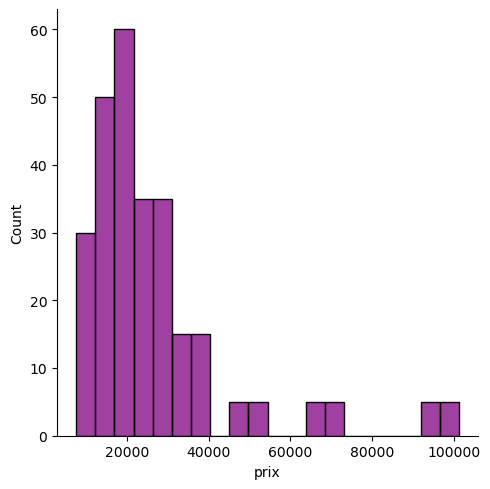

In [8]:
sns.displot(catalogue['prix'], color="purple", bins=20, kde=False)
plt.show()

Ce shema confirme qu'il ya effectivement plus de $50%$ des véhicules ayant un prix suprérieure a $20000$

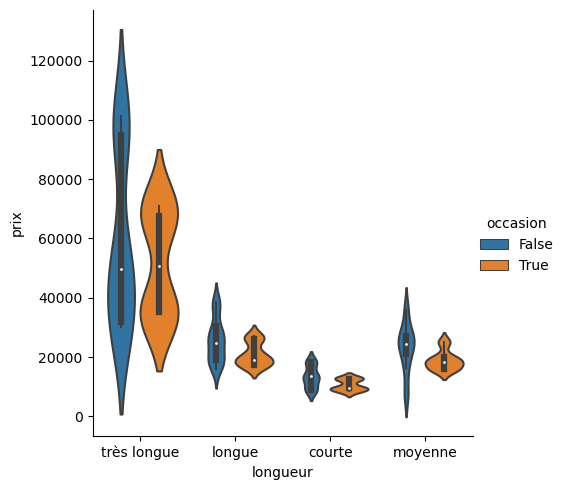

In [9]:
sns.catplot(data=catalogue, x="longueur", y="prix", hue="occasion", kind="violin")
plt.show()

il semblerait que d'après ce shèma que les prix des véhicules soit plus compréhensibles en fonction de sa longueur et qu'il s'agit d'une occasion ou pas. 
le prix d'une voiture dépend de sa longueur

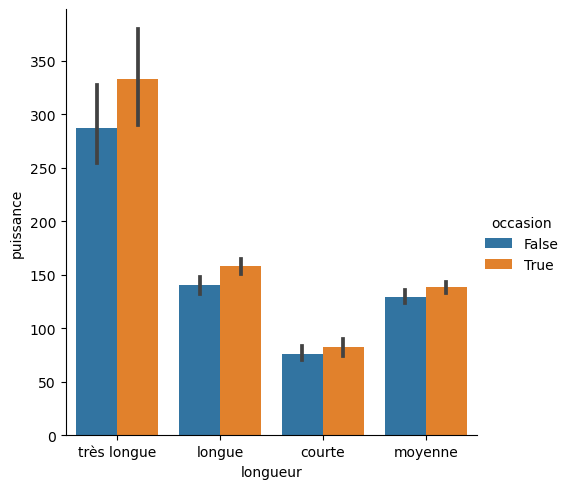

In [10]:
sns.catplot(data=catalogue, x="longueur", y="puissance", hue="occasion", kind="bar")
plt.show()

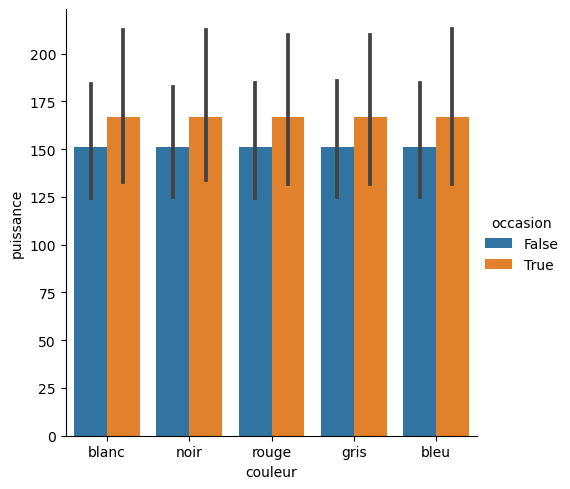

In [11]:
sns.catplot(data=catalogue, x="couleur", y="puissance", hue="occasion", kind="bar")
plt.show()

Il semblerait que plus la voiture est longue plus sa puissance est élever peut importe s'il s'agit d'une voiture d'occasion ou pas.

In [12]:
# g = sns.catplot(
#     data=catalogue,
#     x="prix", y="longueur", row="marque",
#     kind="box", orient="h",
#     sharex=False, margin_titles=True,
#     height=1.5, aspect=4,
# )
# g.set(xlabel="prix", ylabel="")
# g.set_titles(row_template="{row_name} marque")
# for ax in g.axes.flat:
#     ax.xaxis.set_major_formatter('${x:.0f}')
# plt.show()

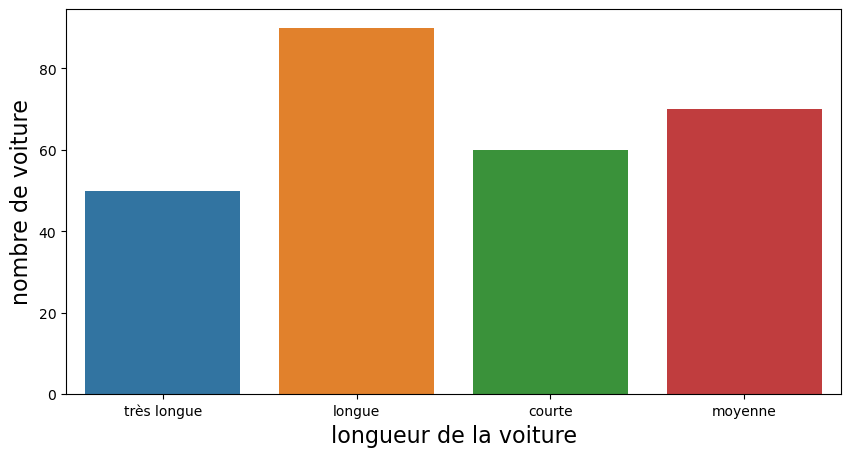

In [13]:
f = plt.figure(figsize=(10,5))
sns.countplot(x='longueur', data = catalogue) 
plt.xlabel('longueur de la voiture', fontsize=16)
plt.ylabel('nombre de voiture', fontsize=16)
plt.show()

In [14]:
# f = plt.figure(figsize=(10,5))
# sns.countplot(x='marque', data = catalogue) 
# plt.xlabel('marque de la voiture', fontsize=16)
# plt.ylabel('nombre de voiture', fontsize=16)
# plt.show()

In [15]:
# f = plt.figure(figsize=(10,5))
# sns.countplot(x='nom', data = catalogue) 
# plt.xlabel('nom de la voiture', fontsize=16)
# plt.ylabel('nombre de voiture', fontsize=16)
# plt.show()

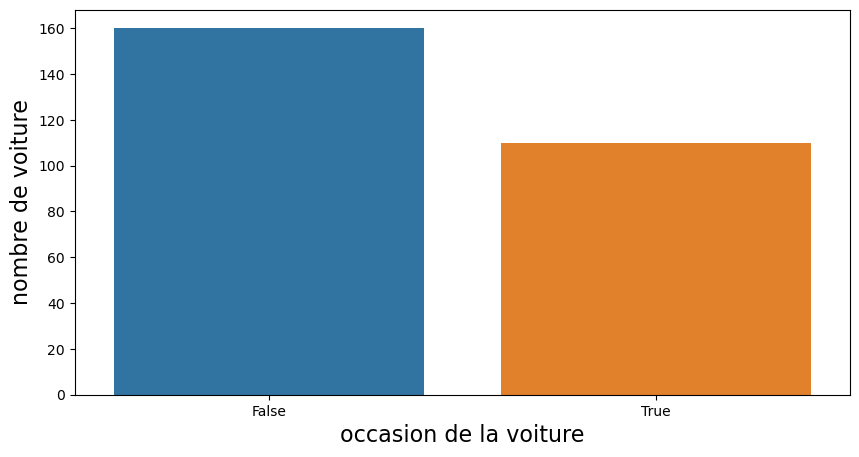

In [16]:
f = plt.figure(figsize=(10,5))
sns.countplot(x='occasion', data = catalogue) 
plt.xlabel('occasion de la voiture', fontsize=16)
plt.ylabel('nombre de voiture', fontsize=16)
plt.show()


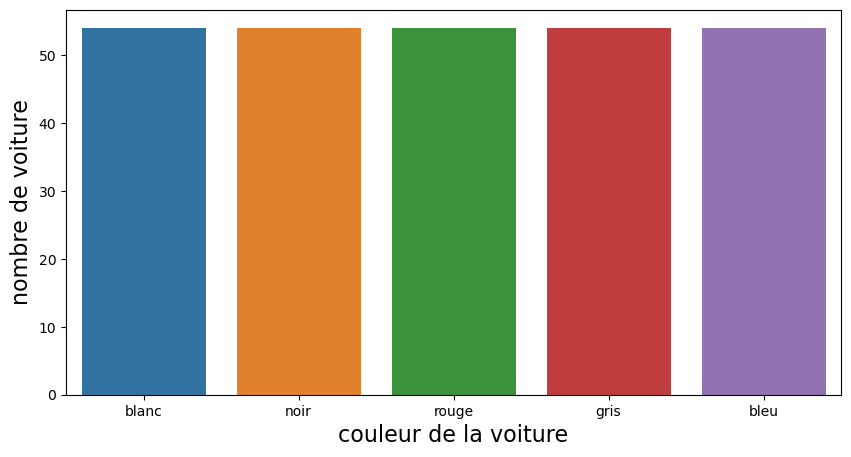

In [17]:
f = plt.figure(figsize=(10,5))
sns.countplot(x='couleur', data = catalogue) 
plt.xlabel('couleur de la voiture', fontsize=16)
plt.ylabel('nombre de voiture', fontsize=16)
plt.show()

les variales catégorielles qui explique au mieux notre catalogue sont les marques, l'occasion et les longueurs des voitures.
mais pour la suite nous allons encoder les variables catégorielles

Encodage

In [18]:
# catalogue.columns

In [19]:
catalogue.marque.unique

<bound method Series.unique of 0      Volvo
1      Volvo
2      Volvo
3      Volvo
4      Volvo
       ...  
265     Audi
266     Audi
267     Audi
268     Audi
269     Audi
Name: marque, Length: 270, dtype: object>

In [34]:
df_cotalogue = catalogue.copy()

In [35]:
cols_ohe = ['marque','occasion','longueur']
cols_num = ['puissance', 'nbPlaces','nbPortes','prix']

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False, drop='if_binary')
df_one = ohe.fit_transform(df_cotalogue[cols_ohe])

df_one = pd.DataFrame(df_one, columns=ohe.get_feature_names_out())

df_one= pd.concat([df_cotalogue[cols_num], df_one], axis=1)

df_one.head()

puissance  nbPlaces  nbPortes   prix  marque_Audi  marque_BMW  \
0        272         5         5  50500          0.0         0.0   
1        272         5         5  50500          0.0         0.0   
2        272         5         5  50500          0.0         0.0   
3        272         5         5  35350          0.0         0.0   
4        272         5         5  35350          0.0         0.0   

   marque_Dacia  marque_Daihatsu  marque_Fiat  marque_Ford  ...  marque_Saab  \
0           0.0              0.0          0.0          0.0  ...          0.0   
1           0.0              0.0          0.0          0.0  ...          0.0   
2           0.0              0.0          0.0          0.0  ...          0.0   
3           0.0              0.0          0.0          0.0  ...          0.0   
4           0.0              0.0          0.0          0.0  ...          0.0   

   marque_Seat  marque_Skoda  marque_Volkswagen  marque_Volvo  occasion_True  \
0          0.0           0.0                0.0           1.0            0.0   
1          0.0           0.0                0.0           1.0            0.0   
2          0.0           0.0                0.0           1.0            0.0   
3          0.0           0.0                0.0           1.0            1.0   
4          0.0           0.0                0.0           1.0            1.0   

   longueur_courte  longueur_longue  longueur_moyenne  longueur_très longue  
0              0.0              0.0               0.0                   1.0  
1              0.0              0.0               0.0                   1.0  
2              0.0              0.0               0.0                   1.0  
3              0.0              0.0               0.0                   1.0  
4              0.0              0.0               0.0                   1.0  

[5 rows x 30 columns]

### 2. Tests des différents approches de clustering

Nous allons nous intéresser a deux approches de clustering

  ## 2.1 Kmeans

In [36]:
X=df_one.iloc[:,:]

Création du modèle
Algorithme KMeans pour décider du nombre de cluster optimal, KMeans++ en utilisant Elbow méthod
pour comprendre K pour KMeans et pour le calcul KMEANS++.

SSE (Sum of Squared errors)

In [37]:
#Une liste contient les valeurs SSE pour chaque k
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

Visualiser la méthode ELBOW pour obtenir la valeur optimale de K

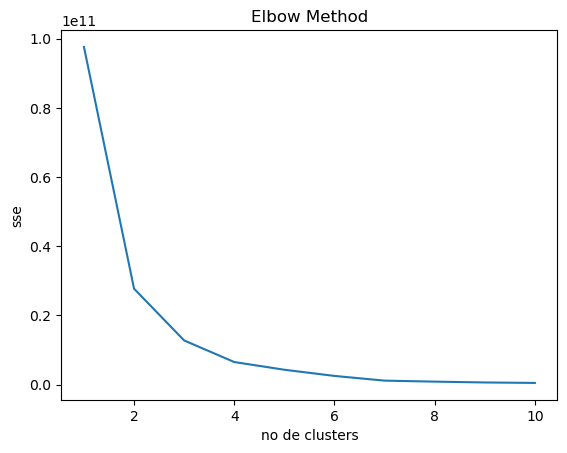

In [38]:
 plt.plot(range(1,11), sse)
plt.title('Elbow Method')
plt.xlabel('no de clusters')
plt.ylabel('sse')

# # Annotate arrow
# plt.annotate('Possible Elbow', xy=(3, 0.6), xytext=(3, 0.2), xycoords='data',          
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# plt.annotate('Possible Elbow', xy=(4, 0.80000), xytext=(5, 0.150000), xycoords='data',          
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()


Si vous faites un zoom arrière sur cette courbe, vous verrez que le dernier coude est à $k$= $4$ Peu importe la plage que nous sélectionnons exemple (1,21) aussi je verrai le même comportement mais si nous choisissons une gamme plus élevée, il est peu difficile de visualiser le coude
C’est pourquoi nous préférons généralement la gamme (1,11)
Enfin, nous avons obtenu que $k=4$

Construction du model

In [39]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)

In [40]:
y_kmeans = kmeansmodel.fit_predict(X)

In [41]:
pd.DataFrame(y_kmeans).nunique().sum()

4

Donc nous avons $4$ Clusters 

Pour l’apprentissage non supervisé, nous utilisons « fit_predict() » dans lequel pour l’apprentissage supervisé, nous utilisons « fit_tranform() »
y_kmeans est le modèle final. Maintenant, nous allons visualiser et tester une autre approche de clusterisation

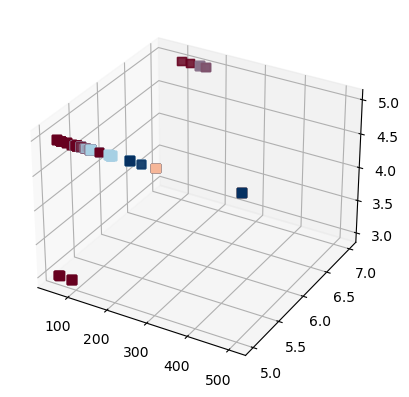

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(X.iloc[:,0])
y = np.array(X.iloc[:,1])
z = np.array(X.iloc[:,2])

ax.scatter(x,y,z, marker="s", c=y_kmeans, s=40, cmap="RdBu")

plt.show()

In [42]:
print(f'La somme des carrées des erreure quadratique (SSE) est = {kmeans.inertia_}')
print()
print(f'La nombre d_itération est = {kmeans.n_iter_}')

La somme des carrées des erreure quadratique (SSE) est = 464901899.70833325

La nombre d_itération est = 3


# Analyse des principal compasantes PCA

Puisqu'il est difficile d'évaluer la qualité de cet algorithme non supervisé en raison de l'absence d'une métrique de qualité explicite telle qu'utilisée dans l'apprentissage supervisé, nous allons effectuer une reduction de dimmension enfin de mieux visualiser nos données et de nous aider à gérer plus facilement la multicolinéeariter qui pourras nous aider lors de l'apprentissage superviser.


L'analyse en composantes principales est l'une des méthodes les plus simples, les plus intuitives et les plus fréquemment utilisées pour la réduction de la dimensionnalité, projetant des données sur son sous-espace orthogonal d'entités.

In [43]:
scaler = StandardScaler()
scaler.fit(X)

#Normalisattion des données
normalize_X  = scaler.transform(X)

pca = PCA(n_components=2)
transforme_X = pca.fit_transform(normalize_X)

Affichons la variance, le ration de la variance expliquer et les différentes composantes

In [44]:
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[[ 0.47039545 -0.0293609   0.27171421  0.45354605 -0.0757996   0.230923
  -0.03674795 -0.13041955 -0.00850145 -0.01802379 -0.01824832 -0.02826213
   0.02819533 -0.08152487 -0.17087397  0.1683334  -0.08720603  0.02037546
  -0.10867703  0.07211178  0.01278297 -0.02036276  0.07279871 -0.12592174
   0.15356212  0.00248808 -0.34527136 -0.01726734 -0.01323344  0.40541409]
 [-0.08244366  0.3876826   0.26743541 -0.10206237 -0.09265952 -0.14118389
  -0.0086514  -0.13103743  0.1270533   0.12990706  0.19476035  0.19798703
   0.11498803 -0.05594191 -0.19921698 -0.12263456 -0.09512783  0.01427762
  -0.08839833  0.15197323  0.11925732  0.09558788 -0.05728763  0.00946352
  -0.10316737 -0.03968274 -0.32503343  0.54321425 -0.08347781 -0.2171773 ]]
[3.77802874 2.70345868]
[0.12546787 0.08978153]


au vu des résultats il est préférable de travailer avec la premiere composante car elle a un ration de $12%$%

Visualisation 

Wall time: 0 ns


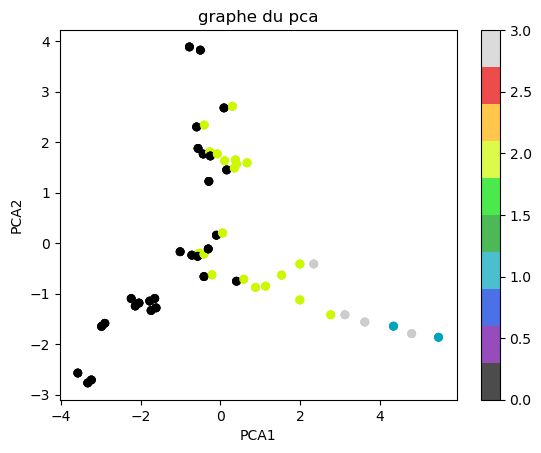

In [32]:
%time
plt.scatter(transforme_X[:,0], transforme_X[:,1], c= y_kmeans, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('graphe du pca')
plt.colorbar()
# plt.legend(["blue", "green", "red"], bbox_to_anchor=(0.75, 1.15, 1.75), ncol=3, handleheight = 0.8, borderpad=0.)
plt.show()

Donc on peut bien voir quatre clusters apparaitre donc la reduction de dimension à bien fonctionner.

# T-distributed Stochastic Neighbor Embedding. TSNE

In [33]:
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(normalize_X)

In [34]:
print(tsne.n_components)
print(tsne.square_distances)

2
legacy


Wall time: 0 ns


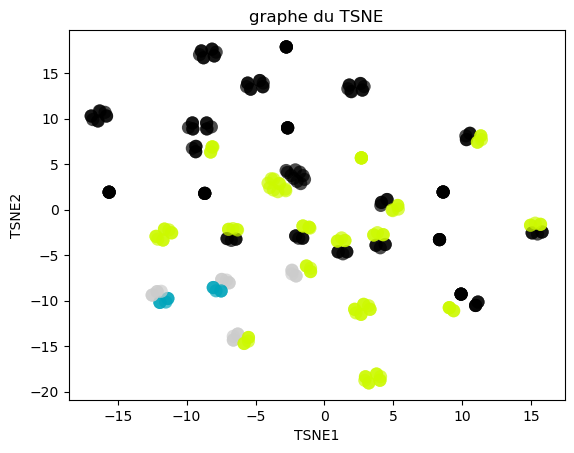

In [35]:
%time
plt.scatter(X_tsne[:,0], X_tsne[:,1], c= y_kmeans, edgecolor='none', alpha=0.7, s=90, cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('graphe du TSNE')
# plt.colorbar()
plt.show()

d'après la visualisation la méthone des tsne nous montre que nous pouvons travailler avec plus de %4% clusters, et de plus elle a un temps d'exécution trés supérieure au pca. 

## Conclusion partiel partie 1

Au regard des données catalogues, ou nous avons pu faire une exploration généraliser des données, nous avons pu comprendre que seul les variables catégorielles marque, longueur, occasion contribut a la comprehension des futurs clients, néamoins nous avons pu par les méthodes de clustérisations identifiers les quatres différents  catégories qu'un client pourais faciliment s'y insérer. Cependant parmit ces méthodes de clustérisation, nous pouvons retenir la méthode, par analyse principal des compasantes _PCA_, puisqu'elle nous donnes un meilleur ratio de la variation $12$ % comparer a sa deuxieme composante à peine $1$ %. Nous ne pouvons par en parler du _PCA_ sans en parle du grahique du _PCA_ qui nous a bien démontre un nombre exacte de clusters. dans cette optique, la suite de notre travail consitera à crée une catégorie à quatre choix _citadelle_ , _ClasRoutier_, _routier_ et _sport_. Ensuite nous allons appliquer différents méthodes d'apprentissage superviser  enfin de prédire la catégorie d'un client lambda.

# Partie 2 
## Attribution à chaque véhicule une catégorie
## test du pca sur le dataframe `Immatriculation`

In [45]:
# os.getcwd()
# os.chdir('C:\\Users\\Ferol\\OneDrive - ESTIA\\Documents\\estia\\machine_learning_2\\TP\\Immatriculations')
df_ima = pd.read_csv('Immatriculations.csv', encoding='latin1')
df_ima.head()

immatriculation      marque           nom  puissance     longueur  nbPlaces  \
0      3176 TS 67     Renault   Laguna 2.0T        170       longue         5   
1      3721 QS 49       Volvo        S80 T6        272  très longue         5   
2      9099 UV 26  Volkswagen  Golf 2.0 FSI        150      moyenne         5   
3      3563 LA 55     Peugeot      1007 1.4         75       courte         5   
4      6963 AX 34        Audi        A2 1.4         75       courte         5   

   nbPortes couleur  occasion   prix  
0         5   blanc     False  27300  
1         5    noir     False  50500  
2         5    gris      True  16029  
3         5   blanc      True   9625  
4         5    gris     False  18310

EDA

In [46]:
df_ima.isna().sum()

immatriculation    0
marque             0
nom                0
puissance          0
longueur           0
nbPlaces           0
nbPortes           0
couleur            0
occasion           0
prix               0
dtype: int64

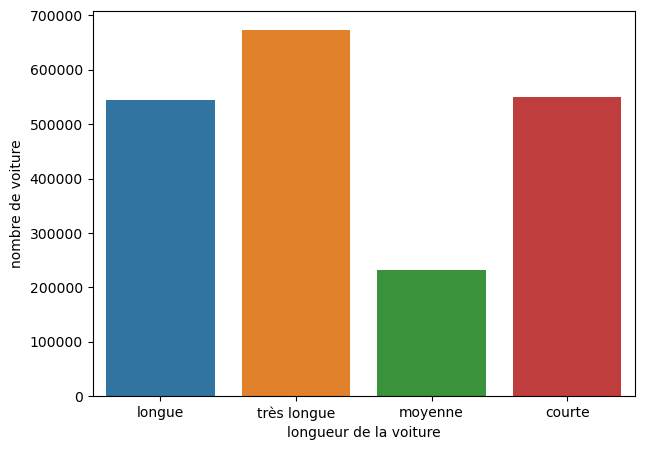

In [38]:
f = plt.figure(figsize=(7,5))
sns.countplot(x='longueur', data = df_ima) 
plt.xlabel('longueur de la voiture', fontsize=10)
plt.ylabel('nombre de voiture', fontsize=10)
plt.show()

In [39]:
# f = plt.figure(figsize=(7,5))
# sns.countplot(x='marque', data = df_ima) 
# plt.xlabel('marque de la voiture', fontsize=10)
# plt.ylabel('nombre de voiture', fontsize=10)
# plt.show()

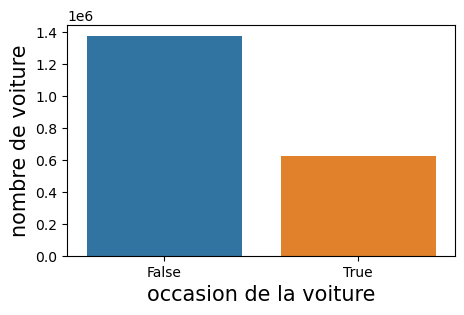

In [40]:
f = plt.figure(figsize=(5,3))
sns.countplot(x='occasion', data = df_ima) 
plt.xlabel('occasion de la voiture', fontsize=15)
plt.ylabel('nombre de voiture', fontsize=15)
plt.show()

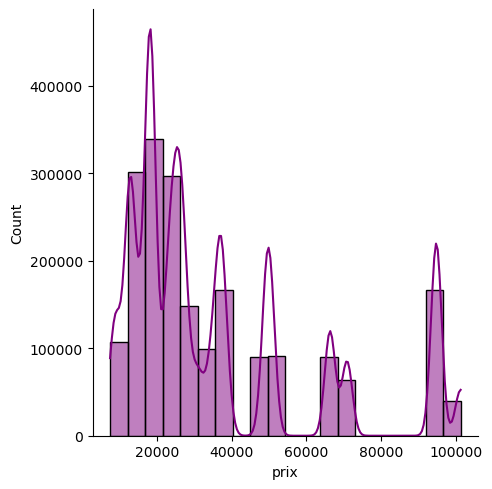

In [41]:
sns.displot(df_ima['prix'], color="purple", bins=20, kde=True)
plt.show()

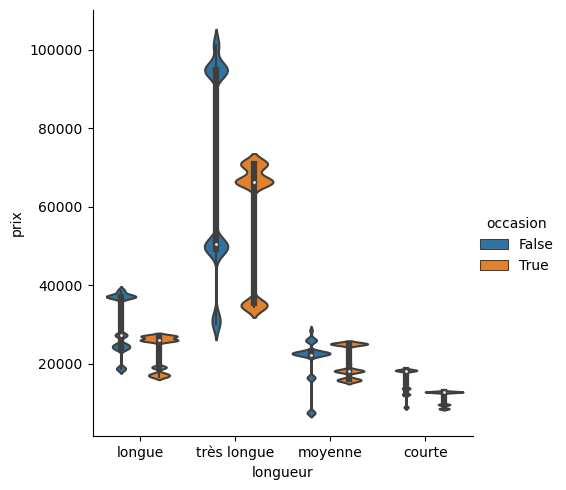

In [42]:
sns.catplot(data=df_ima, x="longueur", y="prix", hue="occasion", kind="violin")
plt.show()

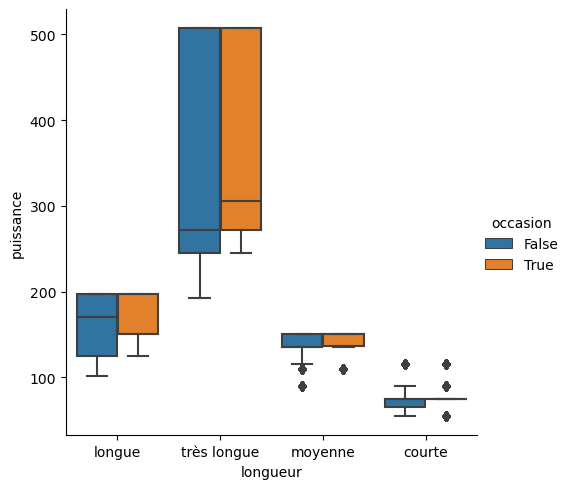

In [43]:
sns.catplot(data=df_ima, x="longueur", y="puissance", hue="occasion", kind="box")
plt.show()

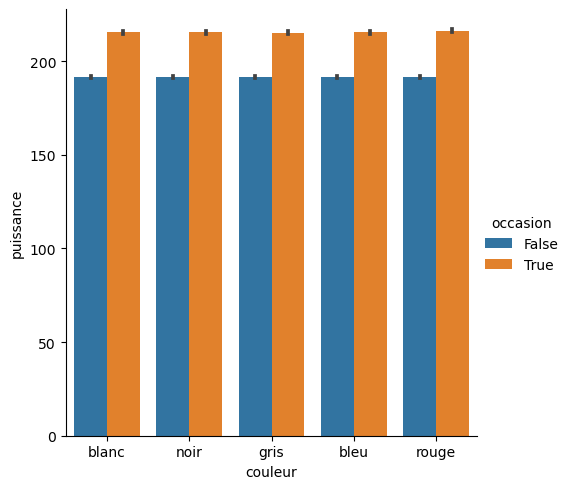

In [44]:
sns.catplot(data=df_ima, x="couleur", y="puissance", hue="occasion", kind="bar")
plt.show()

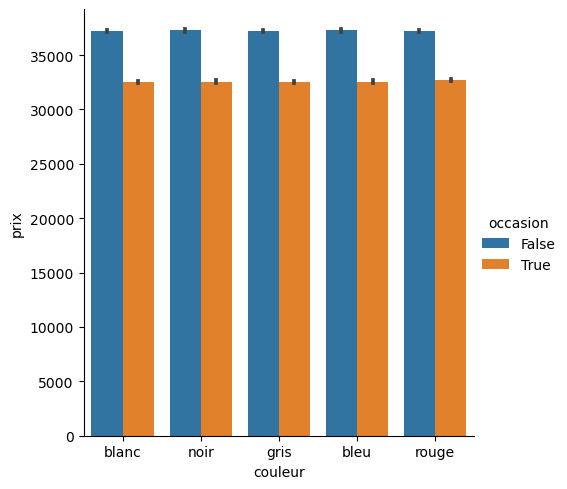

In [45]:
sns.catplot(data=df_ima, x="couleur", y="prix", hue="occasion", kind="bar")
plt.show()

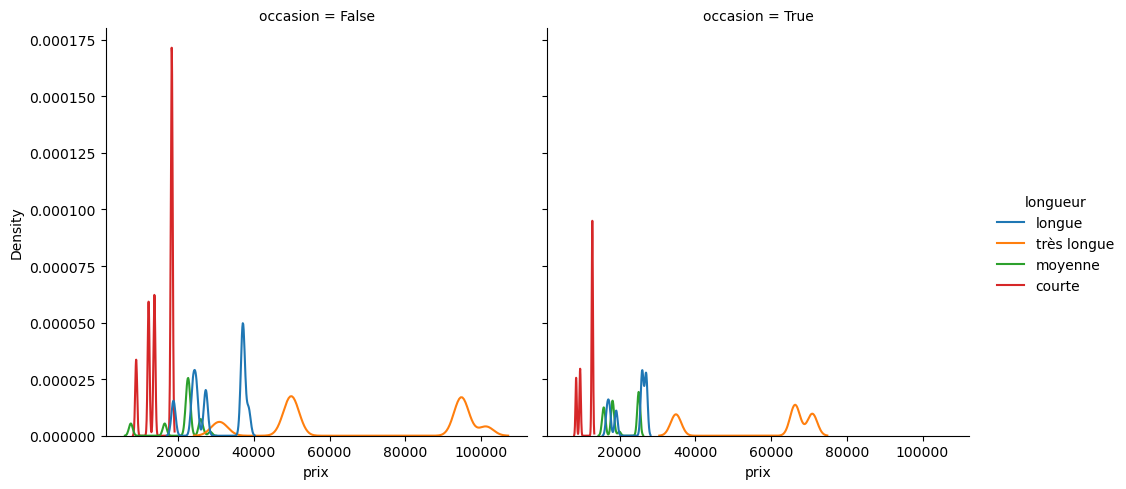

In [46]:
sns.displot(data=df_ima, x="prix", hue="longueur", col="occasion", kind="kde")
plt.show()

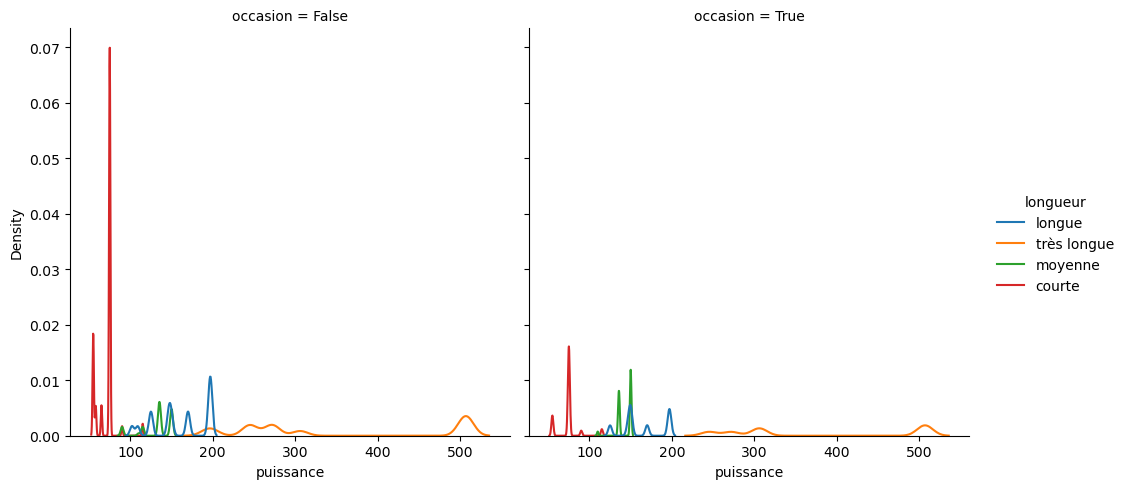

In [47]:
sns.displot(data=df_ima, x="puissance", hue="longueur", col="occasion", kind="kde")
plt.show()

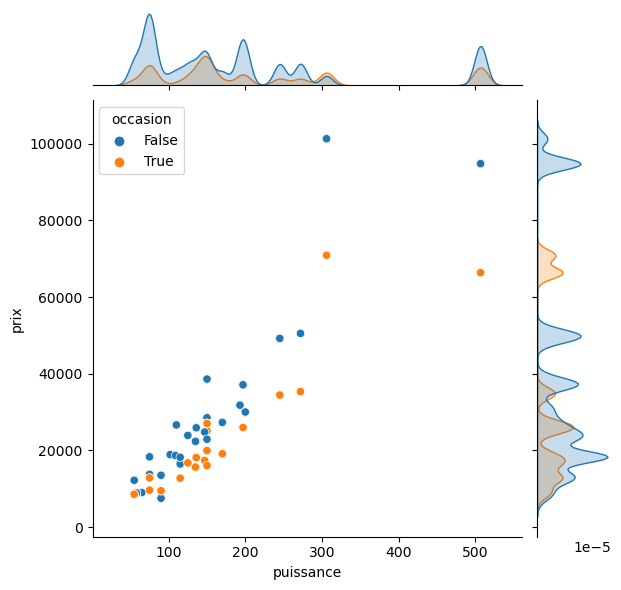

In [48]:
sns.jointplot(data=df_ima, x="puissance", y="prix", hue="occasion")
plt.show()

On peut voire qu'il y'a les points superposser
annalyse des données imma avec les clients pour bien regarder liens

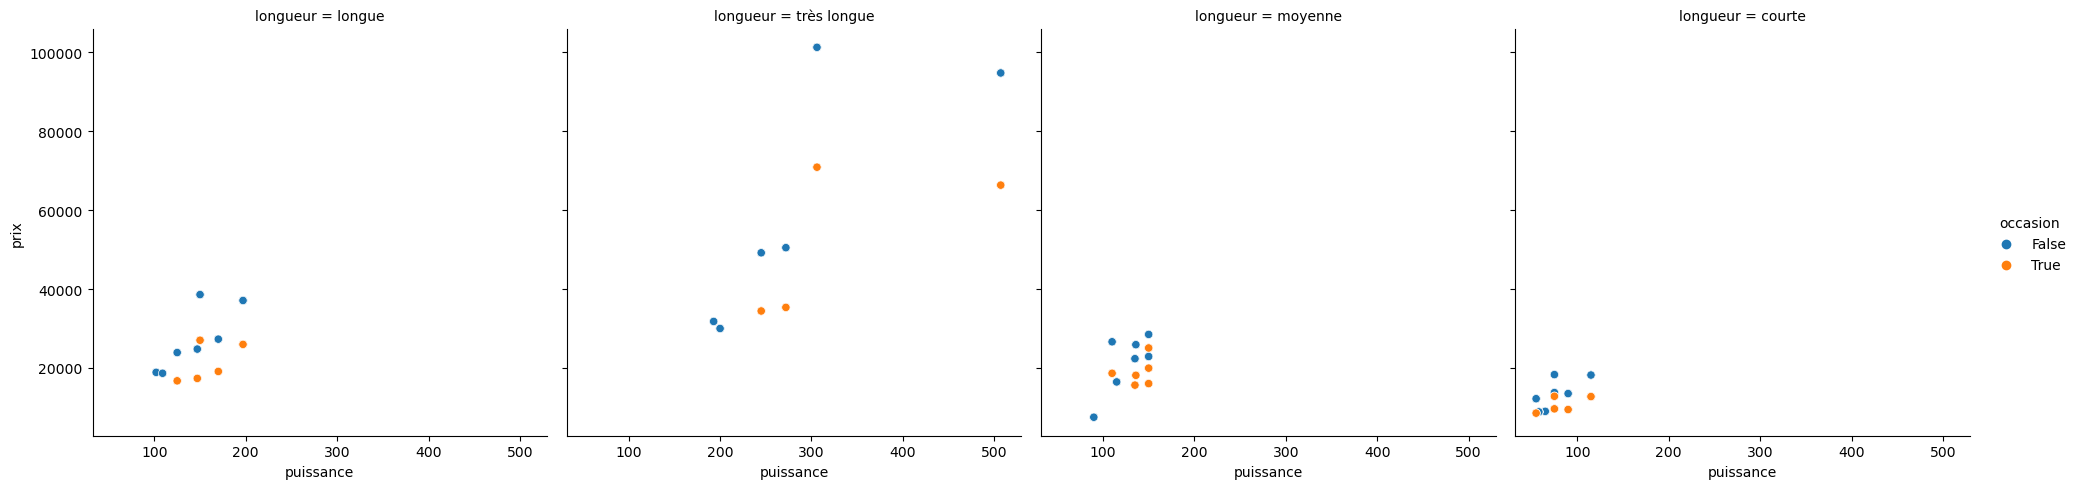

In [49]:
sns.relplot(data=df_ima, x="puissance", y="prix", hue="occasion", col="longueur")
plt.show()

In [50]:
sns.relplot(data=df_ima, x="puissance", y="prix", hue="occasion", col="longueur", row="marque")

Encodage de immatriculmation

In [47]:
df_ima.columns

Index(['immatriculation', 'marque', 'nom', 'puissance', 'longueur', 'nbPlaces',
       'nbPortes', 'couleur', 'occasion', 'prix'],
      dtype='object')

In [48]:
cols_ohe_im = ['marque','nom','occasion','longueur']
cols_num_im = ['puissance', 'nbPlaces','nbPortes','prix']

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False, drop='if_binary')
df_one_im = ohe.fit_transform(df_ima[cols_ohe_im])

df_one_im = pd.DataFrame(df_one_im, columns=ohe.get_feature_names_out())

df_one_im= pd.concat([df_ima[cols_num_im], df_one_im], axis=1)

df_one_im.head()

puissance  nbPlaces  nbPortes   prix  marque_Audi  marque_BMW  \
0        170         5         5  27300          0.0         0.0   
1        272         5         5  50500          0.0         0.0   
2        150         5         5  16029          0.0         0.0   
3         75         5         5   9625          0.0         0.0   
4         75         5         5  18310          1.0         0.0   

   marque_Dacia  marque_Daihatsu  marque_Fiat  marque_Ford  ...  \
0           0.0              0.0          0.0          0.0  ...   
1           0.0              0.0          0.0          0.0  ...   
2           0.0              0.0          0.0          0.0  ...   
3           0.0              0.0          0.0          0.0  ...   
4           0.0              0.0          0.0          0.0  ...   

   nom_Superb 2.8 V6  nom_Toledo 1.6  nom_Vel Satis 3.5 V6  nom_X-Type 2.5 V6  \
0                0.0             0.0                   0.0                0.0   
1                0.0             0.0                   0.0                0.0   
2                0.0             0.0                   0.0                0.0   
3                0.0             0.0                   0.0                0.0   
4                0.0             0.0                   0.0                0.0   

   nom_Ypsilon 1.4 16V  occasion_True  longueur_courte  longueur_longue  \
0                  0.0            0.0              0.0              1.0   
1                  0.0            0.0              0.0              0.0   
2                  0.0            1.0              0.0              0.0   
3                  0.0            1.0              1.0              0.0   
4                  0.0            0.0              1.0              0.0   

   longueur_moyenne  longueur_très longue  
0               0.0                   0.0  
1               0.0                   1.0  
2               1.0                   0.0  
3               0.0                   0.0  
4               0.0                   0.0  

[5 rows x 56 columns]

Utilisation du modèle entrainner sur les données IMMATRICULATION

In [49]:
X_ima = df_one_im.iloc[:,:]

In [50]:
y_ima =  kmeansmodel.fit_predict(X_ima)

In [51]:
y_ima.shape

(2000000,)

In [52]:
pd.DataFrame(y_ima).nunique().sum()

4

Wall time: 0 ns


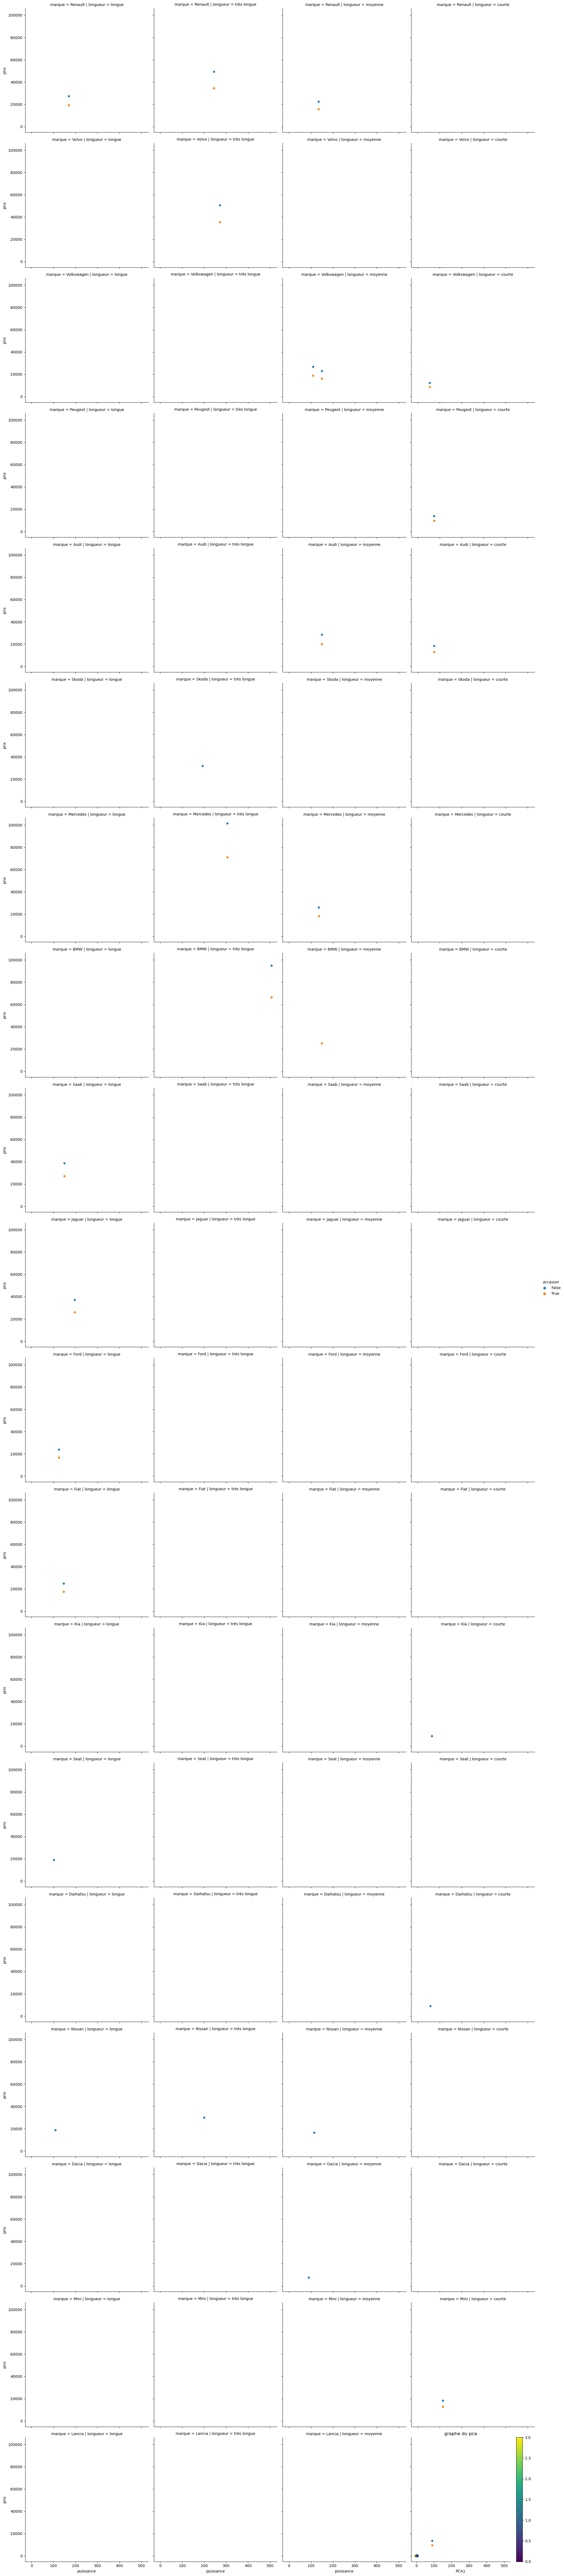

In [57]:
scaler = StandardScaler()
scaler.fit(X_ima)

#Normalisattion des données
normalize_X_ima  = scaler.transform(X_ima)

# pca = PCA(n_components=2)
transforme_X_ima = pca.fit_transform(normalize_X_ima)


%time
plt.scatter(transforme_X_ima[:,0], transforme_X_ima[:,1], c= y_ima, s=40)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('graphe du pca')
plt.colorbar()
plt.show()

In [53]:
df_ima['catégorie'] = y_ima
df_ima.shape

(2000000, 11)

# Partie 3 intéressons nous au dataframe `Client`


In [54]:
os.getcwd()
# os.chdir('C:\\Users\\Ferol\\OneDrive - ESTIA\\Documents\\estia\\machine_learning_2\\TP\\Groupe_TPT_3')

df_client = pd.read_csv('Clients_31.csv', encoding='latin1')
df_client.head()

age sexe taux situationFamiliale nbEnfantsAcharge 2eme_voiture  \
0  37    M  457        Célibataire                0        false   
1  26    F  462          En Couple                2        false   
2  23    M  211          En Couple                2        false   
3  68    F  563           Marié(e)                0        false   
4  47    F  986          En Couple                2        false   

  immatriculation  
0      4920 VZ 62  
1      8605 FC 57  
2      2515 UN 16  
3      1580 JN 60  
4      9723 ID 97

In [55]:
df_client.shape

(100000, 7)

In [61]:
# df_client.info()

In [62]:
# df_client.isna().sum()

On se rend compte que nous ne pouvons pas convertir certaines variables en numérique, parcequelle contiennes des valeurs manquantes sous forme d'espace.
nous allons remplacer ces espaces les `NAN`, par la suite nous allons remplacer ces valeurs manquantes soit par la moyenne soit par la valeur la plus récurente en fonction du type de données.

In [56]:
# Vérification des données manquantes pour les variables nominales
df_client.loc[:,df_client.dtypes == object].apply(lambda x: sum(x == " "), axis=0)

age                   102
sexe                  108
taux                  123
situationFamiliale    114
nbEnfantsAcharge       94
2eme_voiture          105
immatriculation         0
dtype: int64

# note : trim : permet de supprimer les espaces en debut et la fin peut importe le nombre d'espace

In [57]:
# des valeurs manquantes qui contiennes des caractere spécifique
df_client.loc[:,df_client.dtypes == object].apply(lambda x: sum(x == "?"), axis=0)

age                    90
sexe                   84
taux                   91
situationFamiliale     97
nbEnfantsAcharge      104
2eme_voiture          110
immatriculation         0
dtype: int64

Remplacons ces espaces et les valeurs spécifiques par des `nan`

In [58]:
df_client = df_client.loc[:,df_client.dtypes == object].replace("?" , np.nan)
df_client = df_client.loc[:,df_client.dtypes == object].replace(" " , np.nan)
df_client.isna().sum()

age                   192
sexe                  192
taux                  214
situationFamiliale    211
nbEnfantsAcharge      198
2eme_voiture          215
immatriculation         0
dtype: int64

In [59]:
df_client.describe()

age   sexe   taux situationFamiliale nbEnfantsAcharge 2eme_voiture  \
count   99808  99808  99786              99789            99802        99785   
unique     68      7   1001                  7                6            2   
top        19      M    544          En Couple                0        false   
freq     2566  68264    283              63885            45150        86819   

       immatriculation  
count           100000  
unique           99993  
top         7405 DS 81  
freq                 2

Convertion de certaines variables en numérique

In [60]:
df_client['taux'] = pd.to_numeric(df_client['taux'])
df_client['age'] = pd.to_numeric(df_client['age'])
df_client['nbEnfantsAcharge'] = pd.to_numeric(df_client['nbEnfantsAcharge'])                                  

In [62]:
df_client.describe()

age          taux  nbEnfantsAcharge
count  99808.000000  99786.000000      99802.000000
mean      43.631412    609.848556          1.243632
std       18.378725    336.212495          1.388275
min       -1.000000     -1.000000         -1.000000
25%       27.000000    422.000000          0.000000
50%       41.000000    522.000000          1.000000
75%       57.000000    827.000000          2.000000
max       84.000000   1399.000000          4.000000

 1.2 Gérons les valeurs manquantes
- A chaque variable quantitative remplocons ces variables manquentes par la mediane
- A chaque variable qualitative remplacons ces variables manquantes par le mode

In [63]:
# # #variable quantitative
df_client["age"]=df_client["age"].fillna(df_client["age"].median())
df_client["taux"]=df_client["taux"].fillna(df_client["taux"].median())
df_client["nbEnfantsAcharge"]=df_client["nbEnfantsAcharge"].fillna(df_client["nbEnfantsAcharge"].median())

# variable catégorielle
df_client['sexe'].replace([np.nan], df_client['sexe'].mode()[0], inplace=True)
df_client['situationFamiliale'].replace([np.nan], df_client['situationFamiliale'].mode()[0], inplace=True)


In [64]:
df_client['2eme_voiture'].replace([np.nan], df_client['2eme_voiture'].mode()[0], inplace=True)

In [65]:
df_client.isna().sum()

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme_voiture          0
immatriculation       0
dtype: int64

In [66]:
df_client.loc[:,df_client.dtypes == object].apply(lambda x: sum(x == " "), axis=0)

sexe                  0
situationFamiliale    0
2eme_voiture          0
immatriculation       0
dtype: int64

In [67]:
df_client.loc[:,df_client.dtypes == object].apply(lambda x: sum(x == "?"), axis=0)

sexe                  0
situationFamiliale    0
2eme_voiture          0
immatriculation       0
dtype: int64

Visualisation des données

In [68]:
print(set(df_client.sexe))
print(set(df_client.situationFamiliale))
print(set(df_client['2eme_voiture']))

{'Masculin', 'Féminin', 'Femme', 'Homme', 'F', 'M', 'N/D'}
{'Seul', 'Célibataire', 'Seule', 'N/D', 'Marié(e)', 'Divorcée', 'En Couple'}
{'false', 'true'}


In [69]:
df_client.situationFamiliale.value_counts()

En Couple      64096
Célibataire    29885
Seule           4907
Marié(e)         677
Seul             283
N/D               98
Divorcée          54
Name: situationFamiliale, dtype: int64

In [70]:
df_client['situationFamiliale'] = df_client.loc[:,['situationFamiliale']].replace("Seul" , "Célibataire")
df_client['situationFamiliale'] = df_client.loc[:,['situationFamiliale']].replace("Seule" , "Célibataire")

#les couples SONT en MAJORITE on remplace N/D par couple

df_client['situationFamiliale'] = df_client.loc[:,['situationFamiliale']].replace("N/D" , "En Couple")

print(set(df_client.situationFamiliale))

{'Marié(e)', 'Divorcée', 'En Couple', 'Célibataire'}


Nous allons remplacer les femmes par `F` et les hommes par `M`

In [71]:
df_client.sexe.value_counts()

M           68456
F           29467
Homme         682
Masculin      674
Féminin       324
Femme         295
N/D           102
Name: sexe, dtype: int64

In [72]:
df_client['sexe'] = df_client.loc[:,['sexe']].replace("Femme" , "F")
df_client['sexe'] = df_client.loc[:,['sexe']].replace("Féminin" , "F")
df_client['sexe'] = df_client.loc[:,['sexe']].replace("Masculin" , "M")
df_client['sexe'] = df_client.loc[:,['sexe']].replace("Homme" , "M")

# LES HOMMES SONT MAJORITE on remplace N/D par M
df_client['sexe'] = df_client.loc[:,['sexe']].replace("N/D" , "M")
# df_client['sexe'] = df_client.loc[:,['sexe']].replace("nan" , "M")


print(set(df_client.sexe))

{'M', 'F'}


Les variables catégorielles ne nous apportent pas assez d'information graphiquement

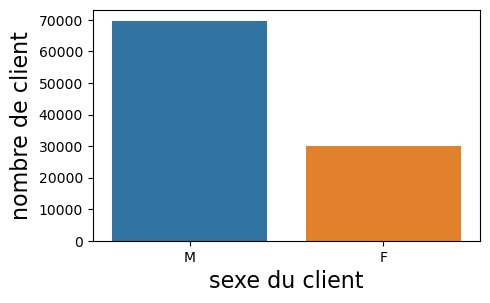

In [80]:
f = plt.figure(figsize=(5,3))
sns.countplot(x='sexe', data = df_client) 
plt.xlabel('sexe du client', fontsize=16)
plt.ylabel('nombre de client', fontsize=16)
plt.show()

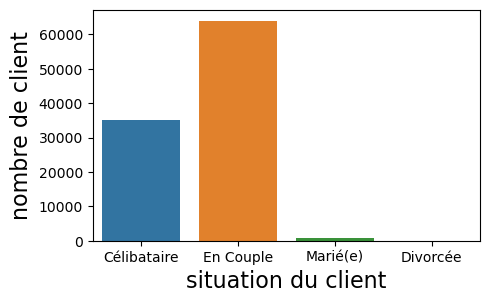

In [81]:
f = plt.figure(figsize=(5,3))
sns.countplot(x='situationFamiliale', data = df_client) 
plt.xlabel('situation du client', fontsize=16)
plt.ylabel('nombre de client', fontsize=16)
plt.show()

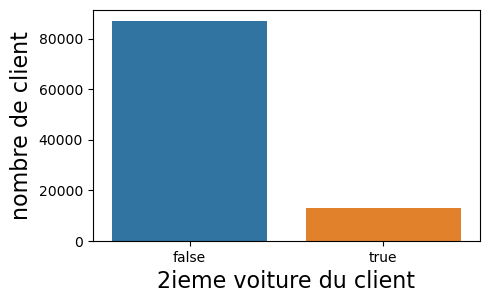

In [82]:
f = plt.figure(figsize=(5,3))
sns.countplot(x='2eme_voiture', data = df_client) 
plt.xlabel('2ieme voiture du client', fontsize=16)
plt.ylabel('nombre de client', fontsize=16)
plt.show()

les données semnlent nous informée que la majoritée des hommes sont mariées et ne possèdent pas une deuxième voiture et par conséquent ces variables catégorielles ont une influence sur le choix de la catégorie.
par la suite nous allons encoder ces variables et passer à notre modèles d'apprentissage

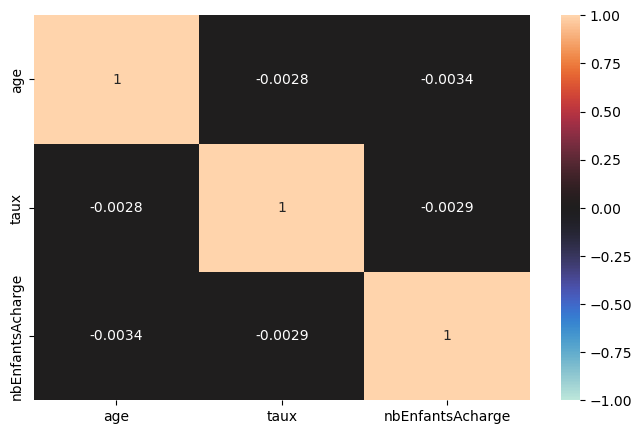

In [83]:
plt.figure(figsize=(8,5))
corr = df_client.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True)
plt.show()

In [84]:
df_client.columns

Index(['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge',
       '2eme_voiture', 'immatriculation'],
      dtype='object')

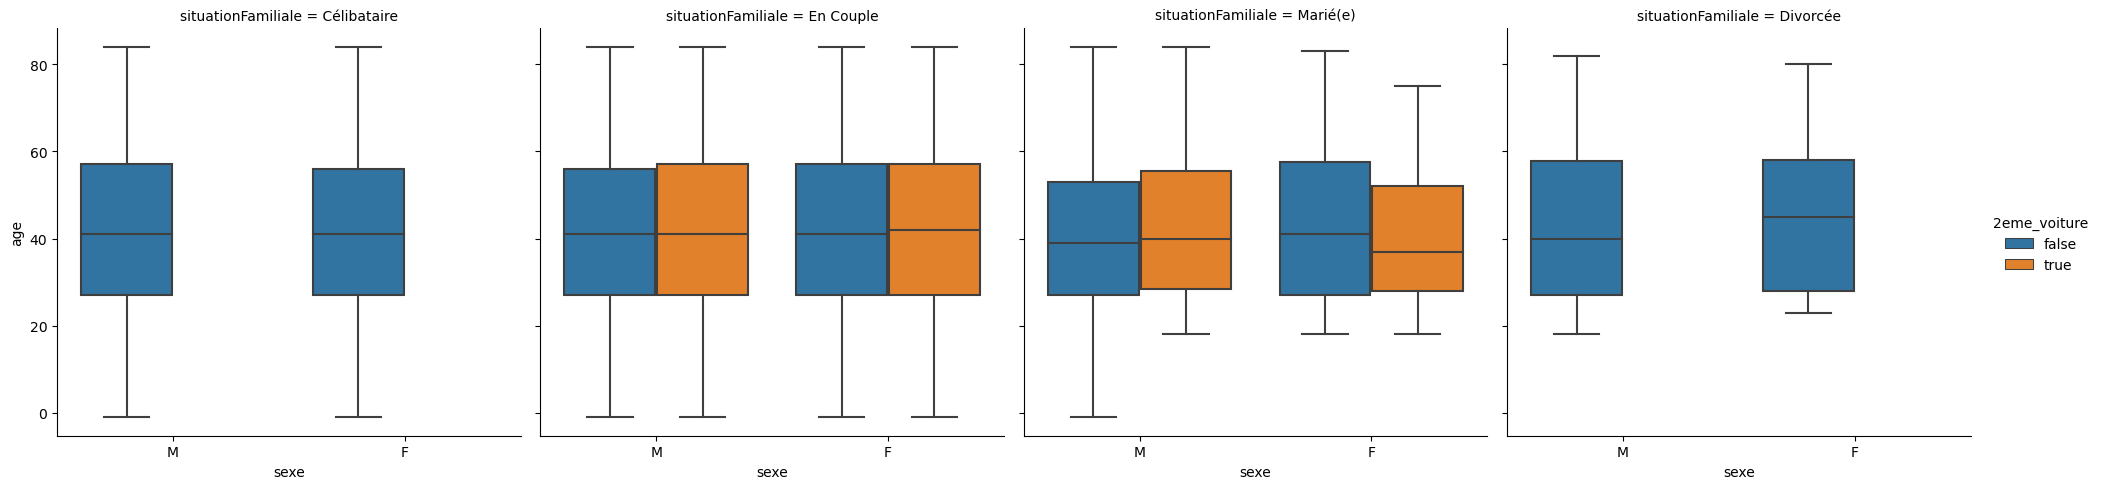

In [85]:
sns.catplot(data=df_client, x="sexe", y="age", hue="2eme_voiture", kind="box", col='situationFamiliale')
plt.show()

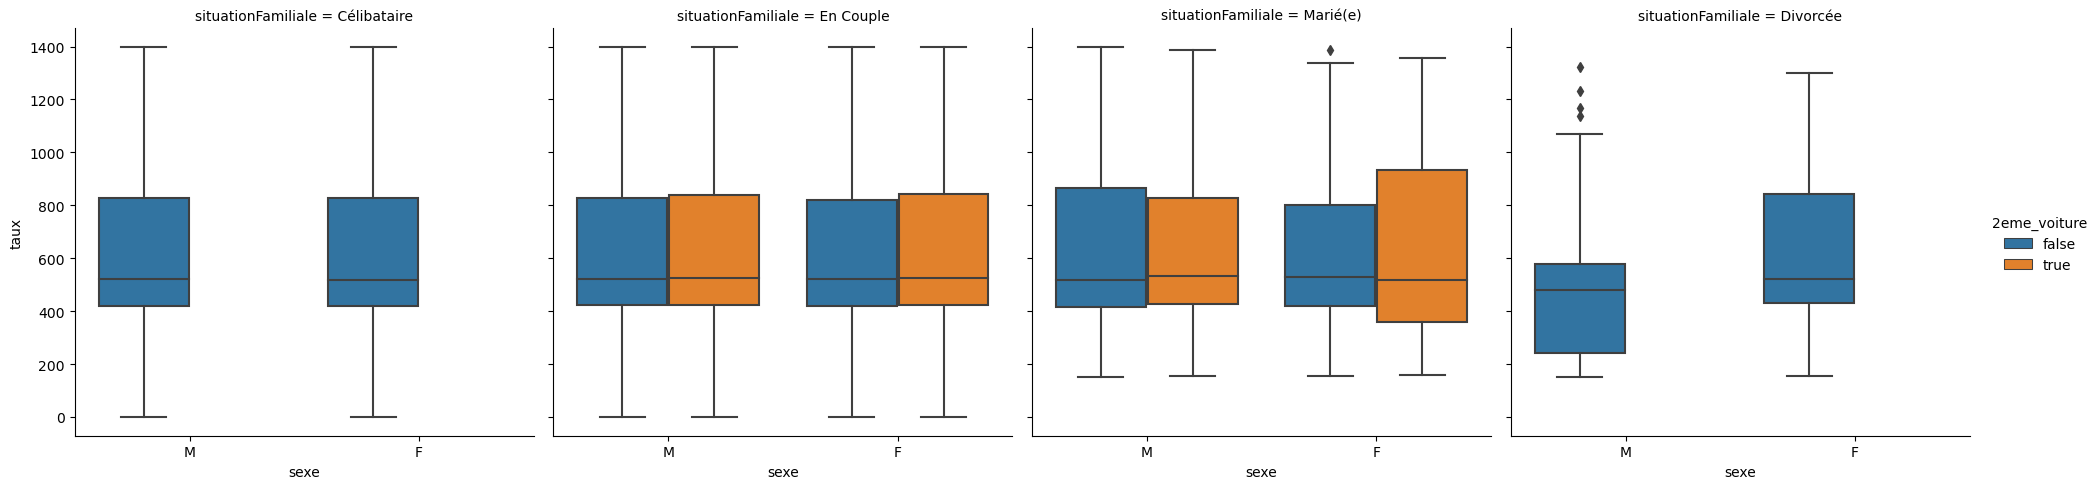

In [86]:
sns.catplot(data=df_client, x="sexe", y="taux", hue="2eme_voiture", kind="box", col='situationFamiliale')
plt.show()

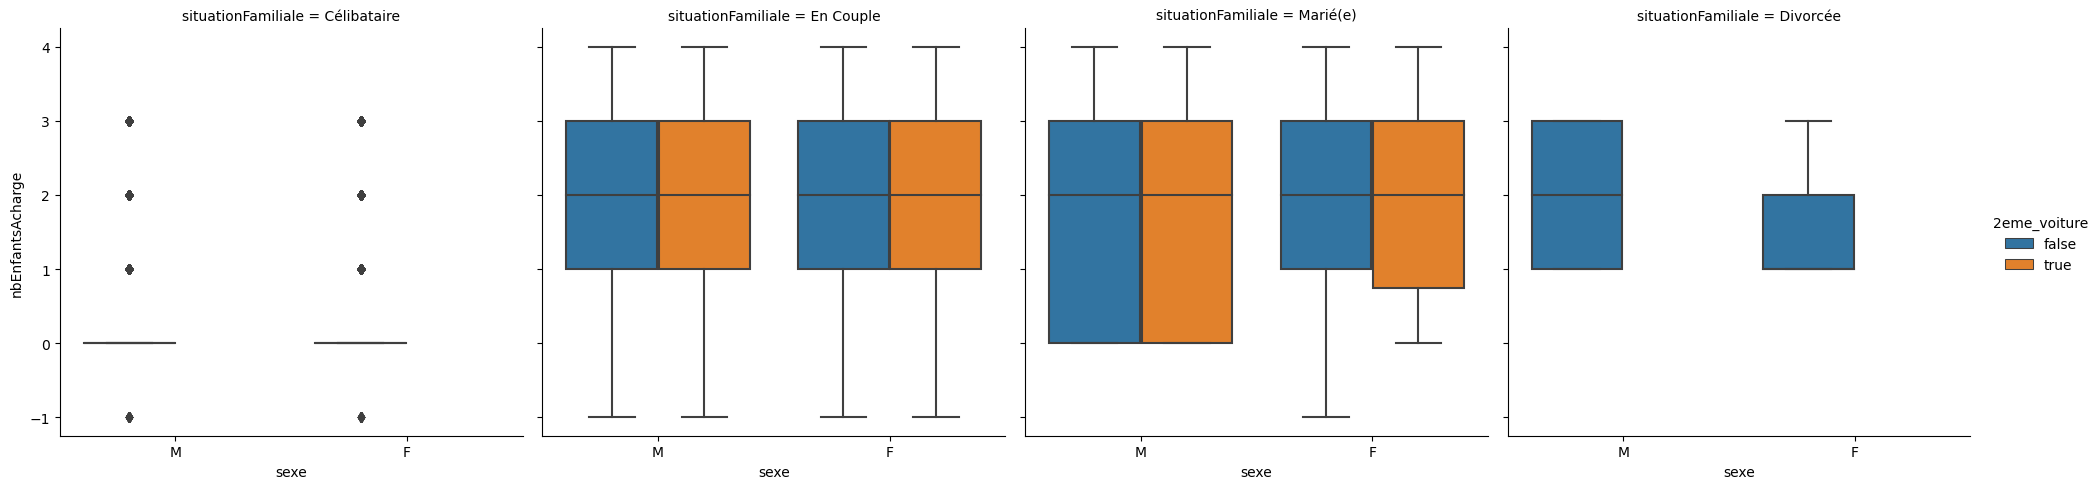

In [87]:
sns.catplot(data=df_client, x="sexe", y="nbEnfantsAcharge", hue="2eme_voiture", kind="box", col='situationFamiliale')
plt.show()

In [88]:
# sns.catplot(data=df_client, x="sexe", y="age", hue="situationFamiliale", kind="box")
# plt.show()

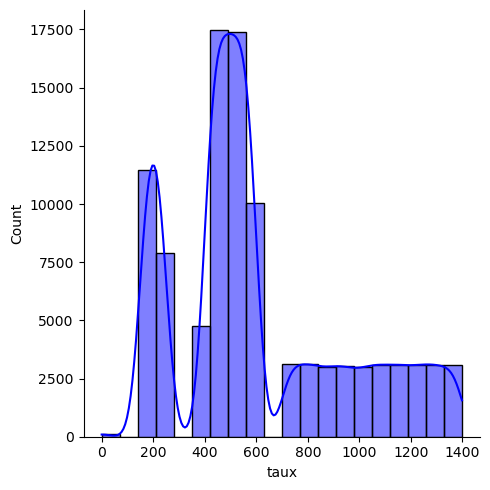

In [89]:
sns.displot(df_client['taux'], color="b", bins=20, kde=True)
plt.show()

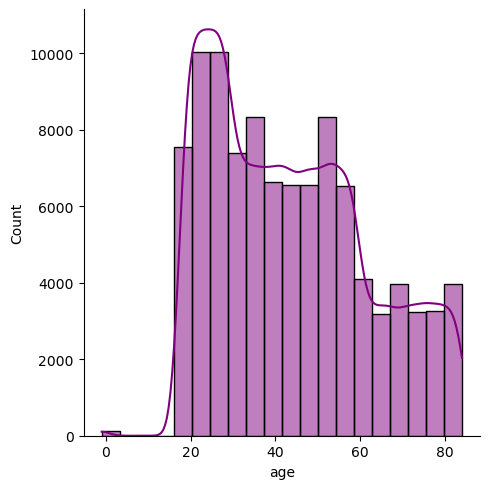

In [90]:
sns.displot(df_client['age'], color="purple", bins=20, kde=True)
plt.show()

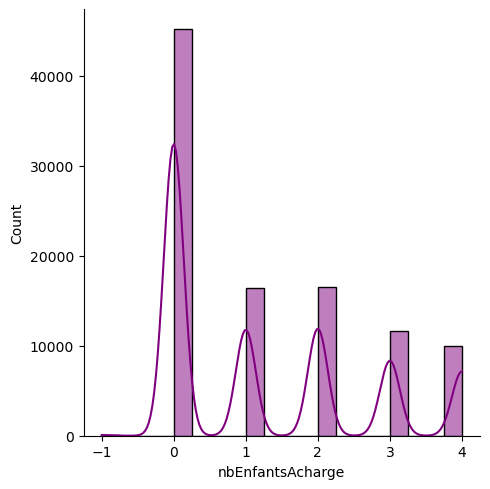

In [91]:
sns.displot(df_client['nbEnfantsAcharge'], color="purple", bins=20, kde=True)
plt.show()

##### Fusion des données clients avec  celle d'immatriculation 

In [73]:
df_merge_client_immatrucalion = pd.merge(df_client, df_ima)

print(df_merge_client_immatrucalion.shape)
print()
df_merge_client_immatrucalion.head()

(100324, 17)



age sexe   taux situationFamiliale  nbEnfantsAcharge 2eme_voiture  \
0  37.0    M  457.0        Célibataire               0.0        false   
1  26.0    F  462.0          En Couple               2.0        false   
2  23.0    M  211.0          En Couple               2.0        false   
3  68.0    F  563.0           Marié(e)               0.0        false   
4  47.0    F  986.0          En Couple               2.0        false   

  immatriculation      marque            nom  puissance longueur  nbPlaces  \
0      4920 VZ 62  Volkswagen    Polo 1.2 6V         55   courte         5   
1      8605 FC 57        Ford     Mondeo 1.8        125   longue         5   
2      2515 UN 16     Renault    Laguna 2.0T        170   longue         5   
3      1580 JN 60        Saab       9.3 1.8T        150   longue         5   
4      9723 ID 97      Jaguar  X-Type 2.5 V6        197   longue         5   

   nbPortes couleur  occasion   prix  catégorie  
0         3   blanc     False  12200          3  
1         5    bleu     False  23900          1  
2         5   blanc      True  19110          3  
3         5   rouge      True  27020          1  
4         5   blanc     False  37100          1

Encodage

In [74]:
cols_ohe_client = ['sexe','situationFamiliale','2eme_voiture']
cols_num_client = ['age','taux','nbEnfantsAcharge', 'catégorie']

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False, drop='if_binary')
df_one_client = ohe.fit_transform(df_merge_client_immatrucalion[cols_ohe_client])

df_one_client = pd.DataFrame(df_one_client, columns=ohe.get_feature_names_out())

df_one_client = pd.concat([df_one_client, df_merge_client_immatrucalion[cols_num_client]], axis=1)

print(df_one_client.shape)
print()
df_one_client.head()

(100324, 10)



sexe_M  situationFamiliale_Célibataire  situationFamiliale_Divorcée  \
0     1.0                             1.0                          0.0   
1     0.0                             0.0                          0.0   
2     1.0                             0.0                          0.0   
3     0.0                             0.0                          0.0   
4     0.0                             0.0                          0.0   

   situationFamiliale_En Couple  situationFamiliale_Marié(e)  \
0                           0.0                          0.0   
1                           1.0                          0.0   
2                           1.0                          0.0   
3                           0.0                          1.0   
4                           1.0                          0.0   

   2eme_voiture_true   age   taux  nbEnfantsAcharge  catégorie  
0                0.0  37.0  457.0               0.0          3  
1                0.0  26.0  462.0               2.0          1  
2                0.0  23.0  211.0               2.0          3  
3                0.0  68.0  563.0               0.0          1  
4                0.0  47.0  986.0               2.0          1

In [76]:
# df_one_client.isna().sum()

encodage

Définition de `X` et de `y`

In [95]:
X,y = df_one_client.iloc[:,0:9], df_one_client.iloc[:,-1]

In [96]:
(X.shape,y.shape)

((100324, 9), (100324,))

# Partir final apprentissage du modèle

#### Preprocessing data

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## mise en echelle

In [98]:
scaler  = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Arbre de décision

on va s"en passe du pipe, on reconstruit un autre modèle

In [99]:
tree= DecisionTreeRegressor(criterion="mae", max_depth=4)

Etant donner qu'avec le pipe nous avons eu des fortes performances, certainement il seblerait qu'on sur entraine les données, ou bien il semblerait qu'il ai assez de valeur abérantes, pour cela grâce au arbre de cécision sélectionnons les meilleurs variable et travaillons avec elle.

In [100]:
tree.fit(X,y)

DecisionTreeRegressor(criterion='mae', max_depth=4)

In [101]:
feature_importances = pd.DataFrame(tree.feature_importances_, index = X.columns)
feature_importances

0
sexe_M                          0.000000e+00
situationFamiliale_Célibataire  4.151363e-01
situationFamiliale_Divorcée     0.000000e+00
situationFamiliale_En Couple    0.000000e+00
situationFamiliale_Marié(e)     0.000000e+00
2eme_voiture_true               1.957429e-01
age                             3.067691e-17
taux                            6.853859e-02
nbEnfantsAcharge                3.205822e-01

les colonnes les plus importantes sont :
- 'age' ,'taux', 'nbEnfantsAcharge'
- 'situationFamiliale_Célibataire',  '2eme voiture_true'

## sans les feature_importances_

In [102]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=4)

In [103]:
y_pred= tree.predict(X_test)

In [104]:
mc = pd.crosstab(y_test, y_pred)
mc

col_0       0.0   1.0   2.0   3.0
catégorie                        
0          2562  1698     1     7
1           953  5991     4  1901
2             8  1019  1578     4
3             8  1212     2  8133

In [105]:
# le R^2
tree.score(X_test, y_test)

0.5015149587567831

In [144]:
#LA PRONFONDEUR De  l'ARBRE
tree.get_depth()

4

In [145]:
%matplotlib inline
plt. figure (figsize=(100, 200))
plot_tree(tree,max_depth=4, filled="True", proportion=True)
plt.show()

ce modèle est précis à $50$%

## Utilisation des variables importants

In [106]:
X_feature_importan = X[['age' ,'taux', 'nbEnfantsAcharge','situationFamiliale_Célibataire', '2eme_voiture_true']]

In [107]:
X_train_fm, X_test_fm, y_train_fm, y_test_fm = train_test_split(X_feature_importan, y, random_state=42)

In [108]:
tree.fit(X_train_fm,y_train_fm)

DecisionTreeRegressor(criterion='mae', max_depth=4)

In [110]:
tree.score(X_test_fm, y_test_fm)

0.5015149587567831

In [111]:
tree.predict(X_test_fm)

array([3., 3., 3., ..., 3., 3., 3.])

In [112]:
pd.crosstab(y_test, tree.predict(X_test_fm))

col_0       0.0   1.0   2.0   3.0
catégorie                        
0          2562  1698     1     7
1           953  5991     4  1901
2             8  1019  1578     4
3             8  1212     2  8133

In [152]:
print("Decision tree, MSE = %.2f" % np.sum((y_test_fm -  tree.predict(X_test_fm)) **2))
print()

Decision tree, MSE = 16303.00



In [153]:
%matplotlib inline
plt. figure (figsize=(100, 200))
plot_tree(tree,max_depth=4, filled="True", proportion=True)
plt.show()

conclusion avec ou sans les colonnes importantes on obtients les memes resultats, donc pour la suite on peut travailler avec ceux qui sont importantes

# Random forests

In [113]:
# X_train_fm, X_test_fm, y_train_fm, y_test_fm = train_test_split(X_feature_importan, y, random_state=42)

In [114]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=1)

In [115]:
rf.fit(X_train_fm,y_train_fm)

RandomForestClassifier(max_depth=4, random_state=1)

In [116]:
predictions = rf.predict(X_test_fm)

In [117]:
# accuracy_score(y_test, predictions)
rf.score(X_test_fm, y_test_fm)

0.7732147840995176

In [118]:
pd.crosstab(y_test_fm, predictions)

col_0         0     1     2     3
catégorie                        
0          2556  1703     1     8
1             6  6748     2  2093
2             3  1021  1581     4
3             2   843     2  8508

### avec le rf on a une meilleurs precision du modele, qui est de $77$%

recherche des meilleurs paramètre pour notre rf

In [160]:
import time
from sklearn.model_selection import train_test_split, GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)

end = time.time()

print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  514.34


Une fois que nous avons la meilleure combinaison de paramètres, nous définissons les paramètres de notre modèle.

In [161]:
rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  max_depth = 4)


RandomForestClassifier(criterion='entropy', max_depth=4, max_features=None,
                       random_state=1)

In [162]:
rf.fit(X_train_fm,y_train_fm)
predictions = rf.predict(X_test_fm)

print(pd.crosstab(y_test_fm, predictions))

print(rf.score(X_test_fm, y_test_fm))

col_0         0     1     2     3
catégorie                        
0          2556  1700     1    11
1             6  6319     2  2522
2             3  1020  1581     5
3             2    38     2  9313
0.7882062118735298


#### Ainsi grace a la GridSearch nous avons obtenue une meilleur perfomence de $79$%

Il est important de noter que pour obtenir Out of Bag Error Rate (Taux d'erreur hors sac) il faut que `bootstrap = True`

In [177]:
# Calculer le taux d'erreur en comparant les prédictions aux valeurs réelles
error_rate = 1 - accuracy_score(y_test_fm, predictions)

# Afficher le taux d'erreur
print("Taux d'erreur : {:.2%}".format(error_rate))

Taux d'erreur : 21.18%


# Utilisation du pipeline

In [119]:
import mlflow
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### sauvegarde du dataframe df_one_client

In [78]:
import pickle
with open("dataFinal.pkl", "wb") as file:
    pickle.dump(df_one_client, file)

In [121]:
# Paramètres à tester
n_estimators_rf_list = [100, 500, 1000]
n_estimators_ada = [50, 100, 200]
# C_svm = [0.1, 1, 10]
n_neighbors_knn = [5, 10, 20]

run_name = "my_run"

experiment_id = mlflow.create_experiment("Models_FinaleTpt1")

# Boucle pour tester toutes les combinaisons d'hyperparamètres
for n_estimators_rf in n_estimators_rf_list:
    for j in range(len(n_estimators_ada)):
        for l in range(len(n_neighbors_knn)):
            # Début du run MLflow
            with mlflow.start_run(run_name=run_name, experiment_id=experiment_id):
                # Initialisation du modèle
                rf = make_pipeline(RandomForestClassifier(random_state=0, n_estimators=n_estimators_rf))
                ada = make_pipeline(AdaBoostClassifier(random_state=0, n_estimators=n_estimators_ada[j]))
                knn = make_pipeline(KNeighborsClassifier(n_neighbors=n_neighbors_knn[l]))
                pipeline = make_pipeline(
                    VotingClassifier([
                        ('rf', rf),
                        ('ada', ada),
                        ('knn', knn),
                        ])
                    )
                # Entraînement et évaluation du modèle
                pipeline.fit(X_train, y_train)
                score = pipeline.score(X_test, y_test)
                # Enregistrement des résultats dans MLflow
                mlflow.log_param("n_estimators_rf", n_estimators_rf)
                mlflow.log_param("n_estimators_ada", n_estimators_ada[j])
                mlflow.log_param("n_neighbors_knn", n_neighbors_knn[l])
                mlflow.log_metric("score", score)



In [122]:
pipeline.score(X_test, y_test)
# score

0.7712212431721224

In [123]:
pd.crosstab(y_test, pipeline.predict(X_test))

col_0         0     1     2     3
catégorie                        
0          2717  1540     3     8
1           378  6486   188  1797
2             6   913  1685     5
3             6   891     3  8455

### sauvegarde du modele

In [124]:
import pickle

with open("ModeFinal.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [ ]:
# X,y = df_one_client.iloc[:,0:9], df_one_client.iloc[:,-1]

## Notes
VotingClassifier est un classificateur qui combine plusieurs classificateurs individuels pour améliorer les performances de prédiction. Il fonctionne en agrégeant les prédictions des classificateurs individuels pour prendre une décision finale.

GridSearchCV est une classe qui permet de rechercher les meilleurs hyperparamètres pour un modèle en exécutant une recherche exhaustive sur une grille d'hyperparamètres spécifiée. Il essaie toutes les combinaisons possibles d'hyperparamètres pour trouver la meilleure combinaison qui maximise la performance du modèle.

# Effectuer la regression logistique sur ces donnée ,évaluer ses performances à l'aide de la courbe de ROC

2023/03/09 09:13:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cade7e41df6c4f949e7bd2c123247db9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


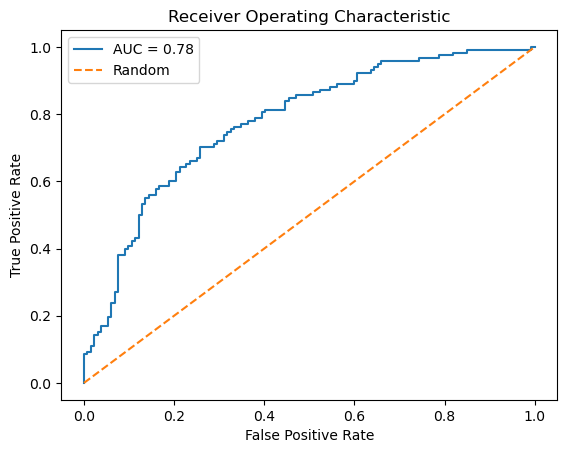

AUC : 0.7782485875706215


In [236]:
# Créer un objet de régression logistique
logreg = LogisticRegression()

# Entraîner le modèle
logreg.fit(X_train, y_train)

# Prédire les classes des données de test
y_pred = logreg.predict(X_test)

# Prédire les probabilités des classes pour les données de test
y_proba = logreg.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs, les taux de vrais positifs et les seuils de décision
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculer l'aire sous la courbe ROC (AUC)
auc = roc_auc_score(y_test, y_proba)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label="AUC = %.2f" % auc)
plt.plot([0, 1], [0, 1], "--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

# Afficher l'AUC
print("AUC :", auc)


un score de $78$% indique que notre modèle est capable de bien distinguer les classes positives et négatives

### Estimation du risque du Classiffieur par la methode du leave - one - out 

nous créons un objet de régression logistique. Ensuite, nous divisons les données en ensembles Leave-One-Out en utilisant la classe LeaveOneOut de sklearn. Nous bouclons sur chaque ensemble Leave-One-Out, entraînons le modèle sur toutes les données à l'exception de l'exemple laissé de côté, puis prédisons la classe de l'exemple laissé de côté. Nous stockons les prédictions dans une liste. Après avoir parcouru tous les ensembles, nous calculons l'erreur de prédiction en comparant les prédictions avec les vraies étiquettes. Enfin, nous affichons l'erreur de prédiction LOO.

In [238]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Créer un objet de régression logistique
logreg = LogisticRegression()

# Diviser les données en ensembles Leave-One-Out
loo = LeaveOneOut()
loo.get_n_splits(X)

# Liste pour stocker les prédictions
y_pred = []

# Boucle sur chaque ensemble Leave-One-Out
for train_index, test_index in loo.split(X):
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Entraîner le modèle
    logreg.fit(X_train, y_train)
    
    # Prédire la classe de l'exemple laissé de côté
    y_pred.append(logreg.predict(X_test)[0])
    
# Calculer l'exactitude de prédiction
accuracy = accuracy_score(y, y_pred)

# Afficher l'exactitude de prédiction
print("Exactitude de prédiction LOO :", accuracy)


2023/03/09 09:18:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '99175a93b154448084ee8820eee126f4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:18:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9c52bddf38bb4d54b9e166beddffed42', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:18:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1ae4aa4410364361a51a7c8939fdefc3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:18:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2f8433e7637148c3bc1ca85a3d38e914', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:20:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '32e904f630ef48ee8c3c1009ce7a6a3e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:20:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8383e60739104d638663670b762198ba', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:20:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c801695dbeca45ef9433ca0223caaa5a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:20:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bbb4e3092eea445d8bc4204d4c425244', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:22:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'dfe538cf5cb04a77add788da32b52ffc', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:22:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '75c6eeac04664be2b7efe00e9551bd98', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:22:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6d8d2103ca404f28918bc02d59ea8c6a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:23:03 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1c9f7ee7f18842bdbb17133aae5542ff', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:25:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '016a5e69125141b592c641bcb96e2c75', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:25:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'dac66cf76f4445abb061ad1f0eb3a8a6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:25:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2292c2cfc91348dab6783a9b3f70e184', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:25:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'de88a3dca97943518f988bfeb00493c5', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:27:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0437c64108714436b6cce6145c1144c0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:27:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '09ef788571fb4674b9291117ccc4b631', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:27:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0aa975eaf2e9433f9f95614810315368', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:27:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3f92356e293b43efb1801de0ae6aa604', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:29:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c2a3461ea3004f7b958961f13562f2b1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:29:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '54475764862148c095418a585a4921f3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:29:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eff1bd9e182c4c54808d7daa52555f78', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:29:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd47cce78bad743d6aecbe85315082e30', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:31:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2c35b8e9df9642e780461a7aaa6a8edd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:31:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '596b23cb463a43e4947bcaee3c05ecc8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:32:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c4f27e925ad64a13bb90e384f57d7c64', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:32:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cd4dc3617ba744da95d02178c2001283', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:34:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '31247386ee5f477ebc424167144a5465', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:34:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c301229c0bdc4dd6af3d56785540654f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:34:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7eaf161178fe4c938d9896e09c2f49cf', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:34:12 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '11b5292cd4e34f978dbefadabee84b92', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:36:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ecf2b66adcfa4a8dbc337c42bcaeab47', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:36:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e24d365e801746c0a711a7add95223ab', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:36:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c44c2acdc5164ae08fa0e02830f15e68', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:36:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9f8ded3d0f3c421195cfe3c9198b6e49', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:38:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f845115af68140f3ac9b5493eac1b710', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:38:46 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c3c8e120604c4511b14c07762b86054a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:38:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8a2f47b02ad2455391dbf17cafcbdc2d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:38:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '18209fdc6fe944d68b094751e6d36602', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:40:46 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5b2702aa255046f1815b510c8bfddb34', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:40:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '24c21f0ebd5743999d9bec02d3f412f8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:40:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9a8830badfbe4e839181b61f4f47a673', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:40:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '21ca7ae99c604bae80f3218f88f69819', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:42:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f204b29faf504226bc443217c233c700', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:42:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '74bf4d49c3ad4608a969106419447ccf', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:43:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7f592f0180084047819e2c966d62bcd9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:43:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3fb2893d3fbf4219a48f6008312863f0', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:44:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3aa2159f84c548988b508375d104a43c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:45:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '20cd7ce73ecb4e5daa5a06dea0a51783', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:45:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9153970c6fcd4761a70eea599ccec783', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:45:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e80834673a0a467490b0313756e1f397', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:47:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '08ec0dfaaf36421ab9ace4d10a3e1f9d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:47:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '23f89edfc5b04a2aa3bbb71c748ca9d0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:47:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9973af171abd453f94446c648197c23c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:47:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '00a809fc9c4b492988466aac475ae14c', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:49:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e837c39a6df14c6a94d76f33214ae760', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:49:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '468232f4ca114b758e94ea1d1390d316', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:49:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4222441e674e48cb85a29a1f50d06102', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:49:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '242eb911730a4174be125f9a40b5c53b', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:51:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '38e11f16017242d59a9caf9c21858a2a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:51:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '55017ecb03be4defb7a85cffaf2d3914', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:51:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7f1a6460d29f4f5e99dab46209284952', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:51:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'da2b7c4ecdee492cb107f7f15e28c9c7', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:53:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'aa7e3335e7ca487d94da56256a8148a1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:53:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0b91c528afaa45a28dbdb9384f208534', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:53:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1888f5f758474701a425c782ef9b5d93', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:53:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5c9afef9baa8445ab9b213581dfa74e0', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:55:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '23e39b7a73ca4cadbf5ab316ce9d4b3c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:55:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4db4e6f0139241aeb848558677cb8b57', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:55:46 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5abab3a7ac1f4ab79085e0d55769b33b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:55:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8c17130e25044f0483127fe9d36e8f16', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:57:44 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6befabbaf1c7448c9fee71a71c33bf52', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:57:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bd23da4474da479daa2327c51f984005', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:57:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a8a23d75c6d247ea8de334e6c36b12eb', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:57:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '594bcd7e2a384ba9b8fbd2d2472d3ac1', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 09:59:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a1800e04519a4d7da8fd766dd92e4ef5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 09:59:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '72830c1a54e7407787897915a672885c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:00:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ab67de3366b149d3b49a0ea065f9b7b0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:00:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9740712bf5784cc8949a7fd104d2df96', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:01:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f132ebc98d9f4f5193956b4e471a2b3c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:02:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6e77870cab7446e1939f832f61f621dc', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:02:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e2e7bbb093334a1e94c8ab969064b427', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:02:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5faa154c8f03496db338d0c2ee4ff22e', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:04:03 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '74e63704d0ba433e8dac8a76e26a9f50', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:04:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '953dfaaf749b417c924802e1e06a8477', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:04:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e90acd4537f6411398e20b3c3c456c4d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:04:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '654c728d40704c6aade8d32d4c0681f3', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:06:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '57b77dda5a3e411081ad32ea15f9b759', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:06:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b860c98be613441b8a1d072baa8fba7f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:06:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'acdcd72b64f3421b8197161044bd00e2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:06:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ae426c77aaef430dbc438bfa36f8adf2', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:08:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd9448c6c76a2470394e9a8728095bb78', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:08:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b6f2044904c844d5bc62caadda91ad5c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:08:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c72ee56757e24deb90662c62fc1ef7da', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:08:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6070da20fa2b42f78c160eefcf3804c2', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:10:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fcf210889ea541e5848d7d093afd9538', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:10:23 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cb30828f21b84358af3a3e35e4f363c5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:10:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5bb13255b7964c4f8f7ac77283bd1ca0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:10:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cf3740015eb446f88bafdb57ed6e1c7a', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:12:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '733d3fe8960a4fe2beb6e7f6aa717060', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:12:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cd62a5637e944597a5725b2be051885e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:12:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6485ba56daf24e0fb667e5cd9c8e600a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:12:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a965880cb83c4dffab370c949e6b0efc', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:14:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6f0f7a2058b342239b9e89fa9ef8e8d9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:14:44 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3d91bc494c144a2d9c4440b7e910f7d2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:14:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1edc8b1948364c36a8f01e065c30655a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:14:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'da656a8a643b4c05b4b1d8567b1a0f9b', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:16:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '85a40fe62990456981b021665cb66227', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:16:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '905c77977454487b824a2bb0bfe27c55', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:17:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e439991e057347cc8c0468d351eb58fd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:17:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e29b6f7b7667440b8014a4aacaa5eabf', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:19:03 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b7f00733149a432da406700681bc11b8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:19:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f8d8b095ab464564bdbb38af55ab20e0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:19:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c4dc4b24db154e60b6c617b7a2d7cb31', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:19:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c8553d15ab9a443aa6760a31ed3c5f12', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:21:12 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '21bae4f04a774ae28920796699f93cd0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:21:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '102397caa2c6423faa85be70fbd2de60', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:21:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e6919eb0cdb94f42a2e1585427b947af', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:21:24 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '443e3cbc123644559f83158b0a2f617a', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:23:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4f029d8c185742428a107b37739f9246', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:23:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3bf66c84af8542f2aefe121f813af579', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:23:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5babae806ccd46ceb0b25f0164e3a5d3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:23:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '049cdd9000f4478db64d1cfc878fb621', which will track hyperparameters, performance metrics, model artifacts, and lineage i

2023/03/09 10:25:32 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ef9e6e6013bf464bad90b861876fd100', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:25:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3b9e3d6556e14cb0b7a45dc04efa1399', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:25:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2ad05fb42a8e48b6b2504d15f9d898e6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/03/09 10:25:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '484d355ab06d4862bb03428e7d76a331', which will track hyperparameters, performance metrics, model artifacts, and lineage i

Exactitude de prédiction LOO : 0.717


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [245]:
pd.crosstab(y, y_pred)

col_0    0    1
row_0          
0      355  145
1      138  362